# Machine Learning Engineer Nanodegree
## Introduction and Foundations
## Project: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. To complete this project, you will need to implement several conditional predictions and answer the questions below. Your project submission will be evaluated based on the completion of the code and your responses to the questions.
> **Tip:** Quoted sections like this will provide helpful instructions on how to navigate and use an iPython notebook. 

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.  
Run the code cell below to load our data and display the first few entries (passengers) for examination using the `.head()` function.
> **Tip:** You can run a code cell by clicking on the cell and using the keyboard shortcut **Shift + Enter** or **Shift + Return**. Alternatively, a code cell can be executed using the **Play** button in the hotbar after selecting it. Markdown cells (text cells like this one) can be edited by double-clicking, and saved using these same shortcuts. [Markdown](http://daringfireball.net/projects/markdown/syntax) allows you to write easy-to-read plain text that can be converted to HTML.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [2]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  

**Think:** *Out of the first five passengers, if we predict that all of them survived, what would you expect the accuracy of our predictions to be?*

In [3]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


> **Tip:** If you save an iPython Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

# Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  
The `predictions_0` function below will always predict that a passenger did not survive.

In [4]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

### Question 1

* Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [5]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


**Answer:** *Replace this text with the prediction accuracy you found above.*

***
Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the `survival_stats` function. This function is defined in the `visuals.py` Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.  
Run the code cell below to plot the survival outcomes of passengers based on their sex.

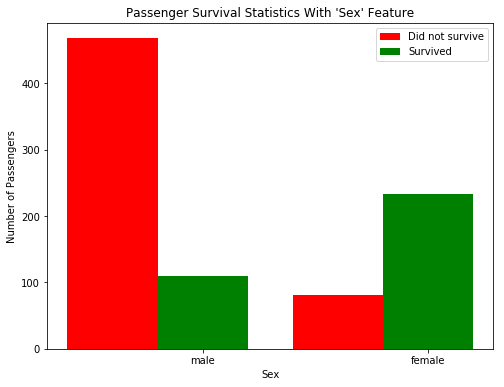

In [6]:
vs.survival_stats(data, outcomes, 'Sex')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can access the values of each feature for a passenger like a dictionary. For example, `passenger['Sex']` is the sex of the passenger.

In [8]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

### Question 2

* How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [9]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


**Answer**: *Replace this text with the prediction accuracy you found above.*

***
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.  
Run the code cell below to plot the survival outcomes of male passengers based on their age.

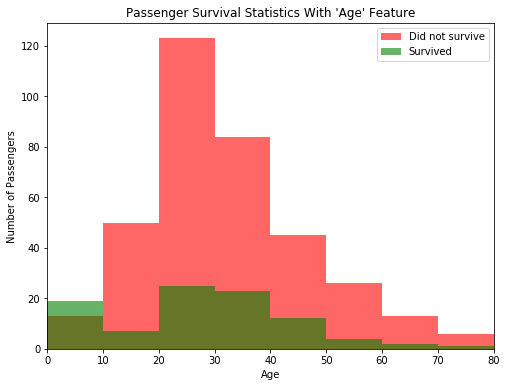

In [10]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.  
Fill in the missing code below so that the function will make this prediction.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_1`.

In [14]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        prediction = 0
        if passenger['Sex'] == 'female':
            prediction = 1
        elif passenger['Age'] <= 10:
            prediction = 1
        predictions.append(prediction)

    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)
predictions.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    1
9    1
dtype: int64

In [12]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif (passenger['Sex'] == 'male') and (passenger['Age'] < 10):
            predictions.append(1)
        else:
            predictions.append(0)
        
       
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

predictions.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    1
9    1
dtype: int64

### Question 3

* How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived? 

**Hint:** Run the code cell below to see the accuracy of this prediction.

In [13]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.24%.


**Answer**: *Replace this text with the prediction accuracy you found above.*

***
Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone. Now it's your turn: Find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This may require multiple features and multiple levels of conditional statements to succeed. You can use the same feature multiple times with different conditions.   
**Pclass**, **Sex**, **Age**, **SibSp**, and **Parch** are some suggested features to try.

Use the `survival_stats` function below to to examine various survival statistics.  
**Hint:** To use mulitple filter conditions, put each condition in the list passed as the last argument. Example: `["Sex == 'male'", "Age < 18"]`

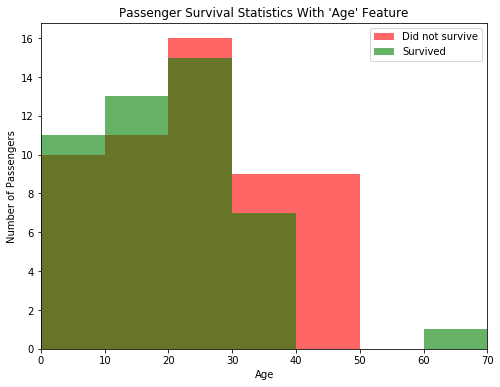

In [14]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "Pclass == 3"])

After exploring the survival statistics visualization, fill in the missing code below so that the function will make your prediction.  
Make sure to keep track of the various features and conditions you tried before arriving at your final prediction model.  
**Hint:** You can start your implementation of this function using the prediction code you wrote earlier from `predictions_2`.

In [15]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        prediction = 0
        if passenger['Sex'] == 'female':
            if not(passenger['Pclass'] > 2.5 and passenger['Age'] > 30 and passenger['Age'] < 60):
                prediction = 1
        elif passenger['Age'] <= 10:
            prediction = 1
        predictions.append(prediction)

    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

### Question 4

* Describe the steps you took to implement the final prediction model so that it got **an accuracy of at least 80%**. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?

**Hint:** Run the code cell below to see the accuracy of your predictions.

In [16]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 80.36%.


**Answer**: *Replace this text with your answer to the question above.*

# Conclusion

After several iterations of exploring and conditioning on the data, you have built a useful algorithm for predicting the survival of each passenger aboard the RMS Titanic. The technique applied in this project is a manual implementation of a simple machine learning model, the *decision tree*. A decision tree splits a set of data into smaller and smaller groups (called *nodes*), by one feature at a time. Each time a subset of the data is split, our predictions become more accurate if each of the resulting subgroups are more homogeneous (contain similar labels) than before. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above. [This link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) provides another introduction into machine learning using a decision tree.

A decision tree is just one of many models that come from *supervised learning*. In supervised learning, we attempt to use features of the data to predict or model things with objective outcome labels. That is to say, each of our data points has a known outcome value, such as a categorical, discrete label like `'Survived'`, or a numerical, continuous value like predicting the price of a house.

### Question 5
*Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.*  

**Answer**: *Replace this text with your answer to the question above.*

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [17]:
full_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
X = full_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
y = full_data['Survived']

In [20]:
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
X['Embarked'] = X['Embarked'].fillna('S')
X['Embarked'].value_counts()

D:\Users\25052288840\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [23]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [24]:
X.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

In [25]:
X = pd.get_dummies(X, columns= ['Sex', 'Embarked'])

In [26]:
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [27]:
X['Age'] = X['Age'].fillna(X['Age'].median())

In [28]:
X['Fare'] = np.log(X['Fare'] + 1)

In [29]:
X.head()

Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0  2.110213           0         1           0   
1       1  38.0      1      0  4.280593           1         0           1   
2       3  26.0      0      0  2.188856           1         0           0   
3       1  35.0      1      0  3.990834           1         0           0   
4       3  35.0      0      0  2.202765           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=7)

In [31]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       134
           1       0.73      0.67      0.70        89

   micro avg       0.77      0.77      0.77       223
   macro avg       0.76      0.75      0.76       223
weighted avg       0.77      0.77      0.77       223



In [35]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8577844311377245
0.7713004484304933
[[112  22]
 [ 29  60]]


In [36]:
def show_features(clf, columns, max=10):
    features = [('{}'.format(nome), '{:0.5f}'.format(impo))
            for nome, impo in zip(columns, clf.feature_importances_)]
    for feature in sorted(features, key=lambda x: x[1], reverse=True)[:max]:
        print(feature)
        
show_features(tree, X.columns)

('Sex_male', '0.51482')
('Pclass', '0.17596')
('Fare', '0.11664')
('Age', '0.11310')
('SibSp', '0.05574')
('Embarked_C', '0.01824')
('Embarked_Q', '0.00550')
('Parch', '0.00000')
('Sex_female', '0.00000')
('Embarked_S', '0.00000')


In [37]:
from sklearn.tree import export_graphviz
from subprocess import call

def show_tree(tree, columns, filename='tree'):
    # Export as dot file
    export_graphviz(tree, 
                    out_file=f'{filename}.dot', 
                    feature_names = columns,
                    class_names = ['Morreu', 'Sobreviveu'],
                    rounded = True, proportion = False, 
                    precision = 2, filled = True)
    # Convert to png
    call([r'D:\Users\25052288840\Downloads\graphviz\release\bin\dot', '-Tpng', f'{filename}.dot', '-o', f'{filename}.png', '-Gdpi=600'])

show_tree(tree, X.columns)

In [38]:
from IPython.display import Image
Image('tree.png')

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

D:\Users\25052288840\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       134
           1       0.71      0.74      0.73        89

   micro avg       0.78      0.78      0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [42]:
print(accuracy_score(y_train, y_pred_rf_train))
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

0.9625748502994012
0.7757847533632287
[[107  27]
 [ 23  66]]


In [43]:
show_features(rf, X.columns)

('Age', '0.24954')
('Fare', '0.24907')
('Sex_male', '0.22183')
('Pclass', '0.08299')
('Sex_female', '0.07246')
('SibSp', '0.05624')
('Parch', '0.02811')
('Embarked_C', '0.01795')
('Embarked_S', '0.01307')
('Embarked_Q', '0.00873')


In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

D:\Users\25052288840\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
y_pred_clf = clf.predict(X_test)
y_pred_clf_train = clf.predict(X_train)

In [46]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       134
           1       0.76      0.72      0.74        89

   micro avg       0.80      0.80      0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [47]:
print(accuracy_score(y_train, y_pred_clf_train))
print(accuracy_score(y_test, y_pred_clf))
print(confusion_matrix(y_test, y_pred_clf))

0.7949101796407185
0.7982062780269058
[[114  20]
 [ 25  64]]


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(min_samples_split=10)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [49]:
y_pred_gb = gb.predict(X_test)
y_pred_gb_train = gb.predict(X_train)

In [50]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       134
           1       0.79      0.70      0.74        89

   micro avg       0.81      0.81      0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223



In [51]:
print(accuracy_score(y_train, y_pred_gb_train))
print(accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

0.907185628742515
0.8071748878923767
[[118  16]
 [ 27  62]]


In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

print(classification_report(y_test, y_pred_ada))

print(accuracy_score(y_train, y_pred_ada_train))
print(accuracy_score(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       134
           1       0.73      0.74      0.74        89

   micro avg       0.79      0.79      0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

0.8368263473053892
0.7892376681614349
[[110  24]
 [ 23  66]]


In [53]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.007, 0.011],
    "min_samples_split": [4, 5, 6],
    "min_samples_leaf": [2, 3],
    "max_depth":[10],
    "max_features":["sqrt"],
    "criterion": ["friedman_mse"],
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(clf.best_params_)

0.9206586826347305
0.8385650224215246
{'criterion': 'friedman_mse', 'learning_rate': 0.007, 'loss': 'deviance', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4}


In [54]:
from sklearn.svm import SVC
parameters = {
    'kernel': ['poly'],
    'C': [0.1, 1, 20],
    'degree': [2, 3]
    }

model = GridSearchCV(SVC(), parameters, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

D:\Users\25052288840\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly'], 'C': [0.1, 1, 20], 'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(model.best_params_)

0.8263473053892215
0.8071748878923767
{'C': 0.1, 'degree': 2, 'kernel': 'poly'}


In [63]:
parameters = {
    'kernel': ['rbf'],
    'C': [0.68, 0.7, 0.78],
    'gamma': [0.11, 0.12, 0.13, 0.14]
    }

model = GridSearchCV(SVC(), parameters, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(model.best_params_)

0.8592814371257484
0.8161434977578476
{'C': 0.7, 'gamma': 0.12, 'kernel': 'rbf'}
